# **<center>Table of Contents</center>**

1. [Introduction of Dropout Layers](#1)
2. [Problem of Overfitting](#2)
3. [The Concept of Dropout](#3)
4. [Random Forest Analogy](#4)
5. [Importing Dependencies](#5)

6. [Dropout Regression Example](#6)
    
    6.1 [Regression Model](#6.1)
    
    6.2 [Dropout Model for Regression](#6.2)
    
    6.3 [Observation for Regression](#6.3)

7. [Dropout Classification Example](#7)

    7.1 [Classification Model](#7.1)
    
    7.2 [Dropout Model for Classification](#7.2)
    
    7.3 [Observation for CLassification](#7.3)
    
8. [End](#end)

<a id="1"></a>
# **<center>Dropout Layers</center>**

<a id="2"></a>
## **Problem of Overfitting** 
The problem starts with overfitting. Overfitting in a machine learning is a major problem that can't be ignored. It is a problem when a machine learning model is trained on training data, it performs well but when unseen data is shown to the model, the performance becomes worse. The main problem at this point of discussion is that **neural networks are prone to error. Reason being is that they are very complex. They have multiple hidden layers and have numerous number of neurons in each layer.** <br>



![Overfitting](https://anarthal.github.io/kernel/assets/img/underfitting-overfitting/overfitting.png) 




**Possible Solutions to avoid Overfitting:**
   1. Increase number of observations (data points)
   2. Reduce complexity of neural network
   3. Early Stopping
   4. Regularization (L1and L2)
   5. Drop out
   
<a id="3"></a>

## **The Concept of Drop Out**

This concept can be understand by the pictures given below. 


    
![Dropout](https://www.researchgate.net/publication/333159107/figure/fig7/AS:759365778825217@1558058318369/Schematic-diagram-of-Dropout-a-a-standard-neural-network-b-the-neural-network-using.png)
    

In the picture on the left side, a complex neural network is created. While on the right, a neural network with drop out layers is created. 

**Working of Dropout**

For each epoch certain numbers of neurons are randomly switched off in each layer and the result is obtained. It eventually means that if you are running 10 epochs, you are certainly running 10 different neural networks on a single problem. The neuron balances the weights for each input. In simple words, the architecture of neural network changes. 

<a id="4"></a>
## **Random Forest Analogy**

To create random forest, multiple decison trees are trained. For example, we have 100 observations. In random forest, either row or column sampling is done or the combination of both. Consider column sampling for instance that 5 out of the ten columns will go and train on a decision tree. Then random 5 columns for second decision tree and then the third. At the end there will be 100 decision trees which will be not completely different from each other; however will not be the same as well. This will create an ensemble of 100 DT. During the time of prediction for a classification problem, majority wins. If the 60 trees says 1, and 40 says 0. Based on the majority, the obseravtion for that particular row should be 1. That is how random forest works. **The same analogy works in Dropout layers. Here p is given a number for example p=0.5, which means that randomly 50 percent of the neurons will be dropped in a singe layer. Be it input or hidden layer.**

**Possibility of Neural Network**

Consider a neural network having total neurons 9. So the combination of neural networks excluding all the neurons in the output layer that can be created is 2<sup>8</sup>. It is because every node/neuron has the random capability to remain present and absent. 

Consider the same neural network with epochs. If number of epoch is 10, then for every and each epoch, a different set of neurons in each and every hidden layer is selected, which increase the number of architecture for the sam set of data. 

This is how the random forest and drop out layers have the same analogy. 

## **Why Dropout is only used at the time of training not at the time of testing? <center>or</center> How predictions work on test data?**

Consider a neural network of an input and one hidden layer for which the dropout layer probability, p = 0.25. It will be for training time. However, at the time of testing all neurons are available. **The question arises that how does it work and what will be the weight of the input neurons to the hidden layer neurons.** 

The answer lies here that the weight of a neuron in training is w. In testing, the weight will become w * (1 - p). If p = 0.25 in the training data, then it means that 25 percent neurons will be dropped.  Thus, in testing the weights will be considered as w * (1 - 0.25) = w * 0.75. Every weight will be multiplied by 0.75 which will work the same way. In simple words, the probability for weight to remain in the architecture is 0.75. 

## **Tips and Tricks**

1. If overfitting, increase p. For underfitting, decrease p. 
2. Dropout is add at the last layer in best archicture (start with the last layer).
3. For CNN, 40 to 50 percent ratio of p works good. While for RNN, 20 to 30 perncet. For ANN, 10 to 50 percent. 

## **Drawbacks**

1. Convergence is delayed (training becomes slow). 
2. The value of loss function changes because calculation of gradient descent becomes difficult, also debuging. 

<a id="5"></a>
# **Importing Dependencies**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import plot_decision_regions

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


<a id="6"></a>
# **Dropout Regression Example**

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

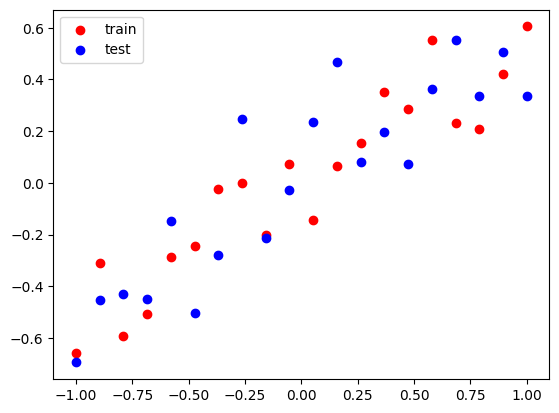

In [6]:
plt.scatter(X_train, y_train, c="red", label="train")
plt.scatter(X_test, y_test, c="blue", label="test")
plt.legend();

<a id="6.1"></a>
## **Regression Model**

In [7]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss="mse", optimizer=adam, metrics=["mse"])
history = model_1.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.0981 - mse: 0.0981 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 2/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 3/500
1/1 [==============================] - 0s 37ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 4/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 5/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 6/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 7/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 8/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0170 - mse: 0.0170

In [8]:
train_mse = model_1.evaluate(X_train, y_train, verbose=0)
test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Train: {train_mse[0]} \n Test: {test_mse[0]}")

Train: 0.004478429444134235 
 Test: 0.04592904821038246


In [9]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 138ms/step


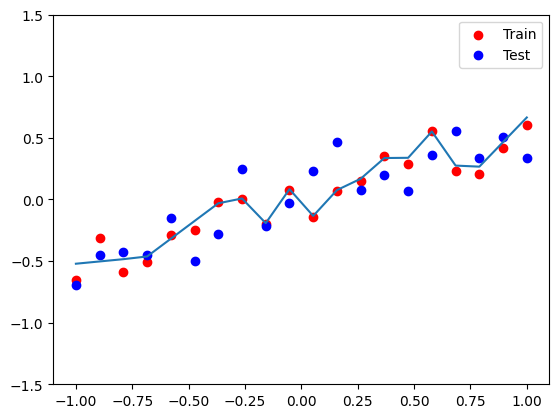

In [10]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

<a id="6.2"></a>
## **Dropout Model for Regression**

In [11]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [12]:
train_mse = model_2.evaluate(X_train, y_train, verbose=0)
test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Train: {train_mse[0]} \n Test: {test_mse[0]}")

Train: 0.011090647429227829 
 Test: 0.0405406728386879


In [13]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 78ms/step


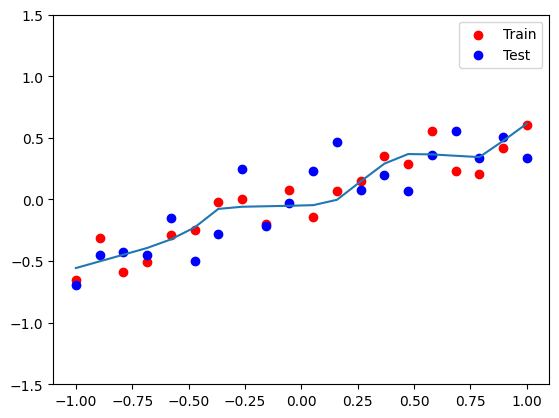

In [14]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

<a id="6.3"></a>
# **Observation for Regression**

The line is smoothen when overfitting is reduced via using Dropout layer technique. 

<a id="7"></a>
# **Dropout Classification Example**

In [15]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [16]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

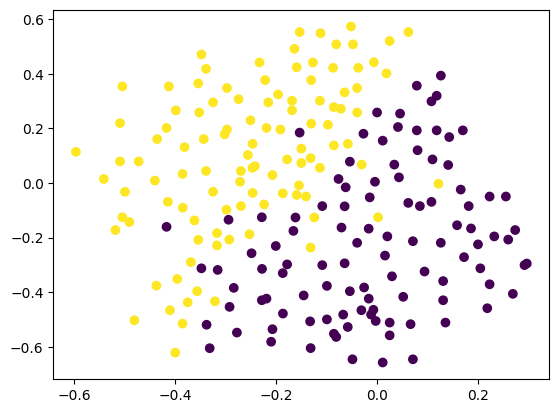

In [17]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<a id="7.1"></a>
## **Classification Model**

In [18]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 43ms/step - loss: 0.5293 - accuracy: 0.7619 - val_loss: 0.8134 - val_accuracy: 0.5581
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2917 - accuracy: 0.8690 - val_loss: 0.5767 - val_accuracy: 0.7209
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2364 - accuracy: 0.9107 - val_loss: 0.3041 - val_accuracy: 0.8605
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2526 - accuracy: 0.9107 - val_loss: 0.3663 - val_accuracy: 0.9535
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3262 - accuracy: 0.8810 - val_loss: 0.5652 - val_accuracy: 0.8140
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 0.4127 - accuracy: 0.8333 - val_loss: 0.4703 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3333 - accuracy: 0.8690 - val_loss: 0.6721 - val_accuracy: 0.7209
Epoch 8/500
6/6 [=======

9600/9600 [==============================] - 12s 1ms/step


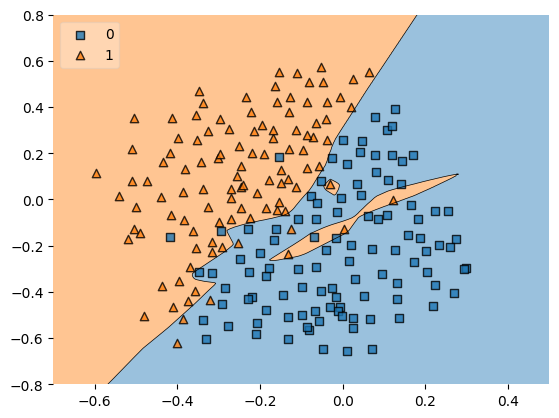

In [19]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

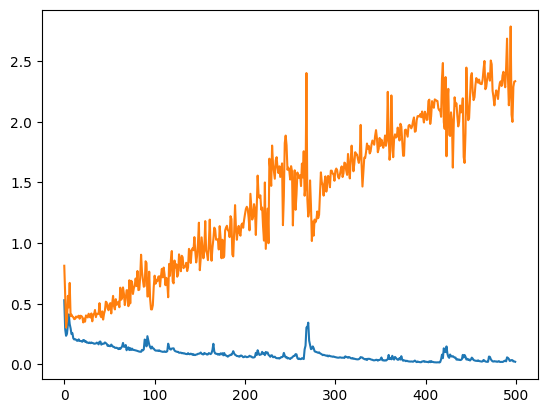

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

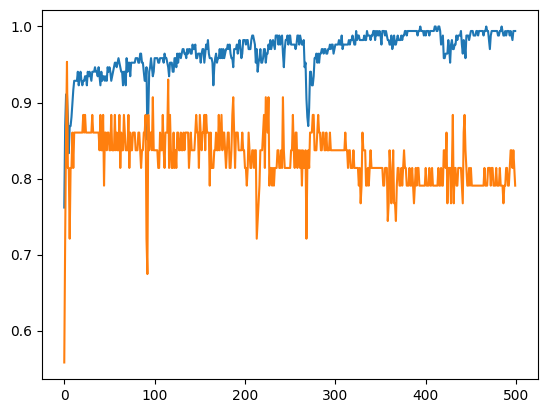

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<a id="7.2"></a>
## **Dropout Model for Classification**

In [22]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 44ms/step - loss: 0.5730 - accuracy: 0.7976 - val_loss: 0.6877 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3166 - accuracy: 0.8750 - val_loss: 0.6715 - val_accuracy: 0.6977
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2815 - accuracy: 0.8690 - val_loss: 0.4252 - val_accuracy: 0.7442
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2874 - accuracy: 0.8750 - val_loss: 0.3648 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2677 - accuracy: 0.8810 - val_loss: 0.3388 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2358 - accuracy: 0.8810 - val_loss: 0.4196 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2297 - accuracy: 0.9107 - val_loss: 0.4263 - val_accuracy: 0.7674
Epoch 8/500
6/6 [=====

9600/9600 [==============================] - 12s 1ms/step


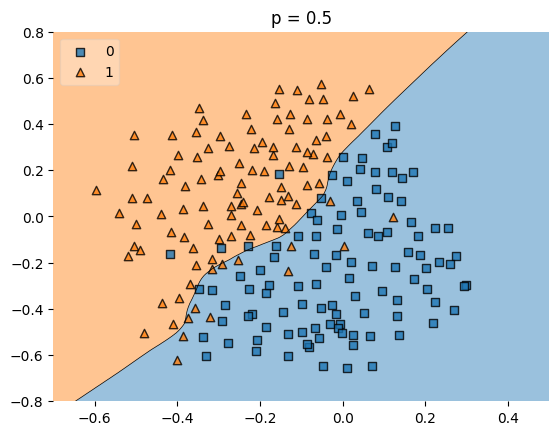

In [23]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

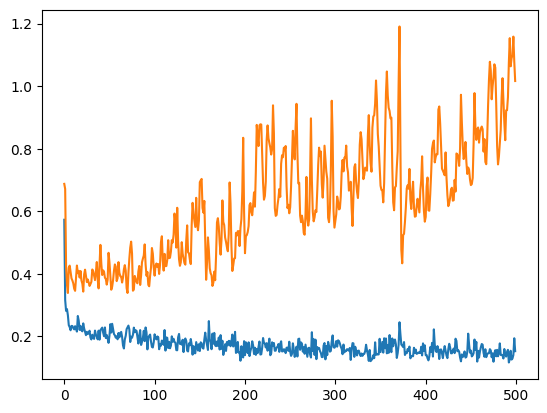

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

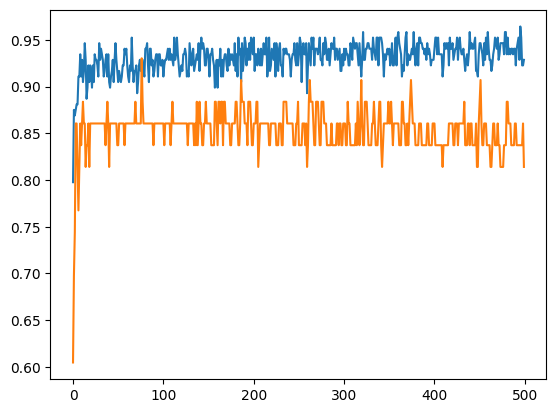

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<a id="7.3"></a>
# **Observation for Classification**

The overfitting is reduced using the dropout layer technique in the classification problem.

<a id="end"></a>
# **<center>End</center>**